In [5]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow import keras
from keras import layers
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.models import Model
from tensorflow.keras import layers

In [6]:
!unzip -q /content/flower.zip -d /content/dataset

In [7]:
traindatagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=30,      # Rotate images
    width_shift_range=0.2,  # Move images left/right
    height_shift_range=0.2, # Move images up/down
    horizontal_flip=True,   # Flip images
    zoom_range=0.2,         # Zoom in/out
    fill_mode='nearest'
)
testdatagen = ImageDataGenerator(rescale=1./255)





In [8]:
train_root = '/content/dataset/train'
test_root = '/content/dataset/test'
training = traindatagen.flow_from_directory(train_root,batch_size=64,target_size=(224,224))


testing = testdatagen.flow_from_directory(test_root,batch_size=64,target_size=(224,224))

Found 3117 images belonging to 5 classes.
Found 1200 images belonging to 5 classes.


In [9]:
# model = keras.Sequential()

# model.add(layers.Conv2D(32,(3,3),activation='relu',input_shape=(300,300,3)))
# model.add(layers.MaxPooling2D((2,2)))


# model.add(layers.Conv2D(64,(3,3),activation='relu'))
# model.add(layers.MaxPooling2D((2,2)))

# model.add(layers.Conv2D(128,(3,3),activation='relu'))
# model.add(layers.MaxPooling2D((2,2)))

# model.add(layers.Conv2D(256,(3,3),activation='relu'))
# model.add(layers.MaxPooling2D((2,2)))

# model.add(layers.Flatten())

# model.add(layers.Dense(512,activation='relu'))

# model.add(layers.Dropout(0.6))

# model.add(layers.Dense(5,activation='softmax'))



# model = VGG16(weights=None, include_top=True)
# model.load_weights(r'D:\PYTHON\transfer laerning\vgg16\vgg16model.h5')
model = VGG16(include_top=False, input_shape=(224,224,3))
model.summary()


#telling the program not to train the layters again just use the things it learned to help us predict

for layer in model.layers:
    layer.trainable = False

flattenlayer = layers.Flatten()(model.output)

finallayer = layers.Dense(512,activation='relu')(flattenlayer)

dropoutlayer = layers.Dropout(0.6)(finallayer)

finallayersoftmax = layers.Dense(5,activation='softmax')(dropoutlayer)





58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 224, 224, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 224, 224, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 112, 112, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 112, 112, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 56, 56, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 28, 28, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 28, 28, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 14, 14, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 7, 7, 512)      │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,714,688 (56.13 MB)

 Trainable params: 14,714,688 (56.13 MB)

 Non-trainable params: 0 (0.00 B)

In [11]:
model= Model(inputs=model.inputs,outputs=finallayersoftmax)
model.compile(loss='categorical_crossentropy',metrics=['accuracy'],optimizer='adam')
history = model.fit(training,validation_data=testing,epochs=60 )

Epoch 1/60
49/49 ━━━━━━━━━━━━━━━━━━━━ 85s 2s/step - accuracy: 0.4726 - loss: 1.4559 - val_accuracy: 0.7117 - val_loss: 0.8389
Epoch 2/60
49/49 ━━━━━━━━━━━━━━━━━━━━ 50s 1s/step - accuracy: 0.6199 - loss: 1.0190 - val_accuracy: 0.7350 - val_loss: 0.7162
Epoch 3/60
49/49 ━━━━━━━━━━━━━━━━━━━━ 50s 1s/step - accuracy: 0.6540 - loss: 0.9146 - val_accuracy: 0.7350 - val_loss: 0.7038
Epoch 4/60
49/49 ━━━━━━━━━━━━━━━━━━━━ 50s 1s/step - accuracy: 0.6814 - loss: 0.8305 - val_accuracy: 0.7942 - val_loss: 0.6145
Epoch 5/60
49/49 ━━━━━━━━━━━━━━━━━━━━ 50s 1s/step - accuracy: 0.6840 - loss: 0.8344 - val_accuracy: 0.7883 - val_loss: 0.5863
Epoch 6/60
49/49 ━━━━━━━━━━━━━━━━━━━━ 50s 1s/step - accuracy: 0.7096 - loss: 0.7585 - val_accuracy: 0.7883 - val_loss: 0.5769
Epoch 7/60
49/49 ━━━━━━━━━━━━━━━━━━━━ 50s 1s/step - accuracy: 0.7196 - loss: 0.7519 - val_accuracy: 0.7942 - val_loss: 0.5504
Epoch 8/60
49/49 ━━━━━━━━━━━━━━━━━━━━ 54s 1s/step - accuracy: 0.7026 - loss: 0.7804 - val_accuracy: 0.8042 - val_loss:

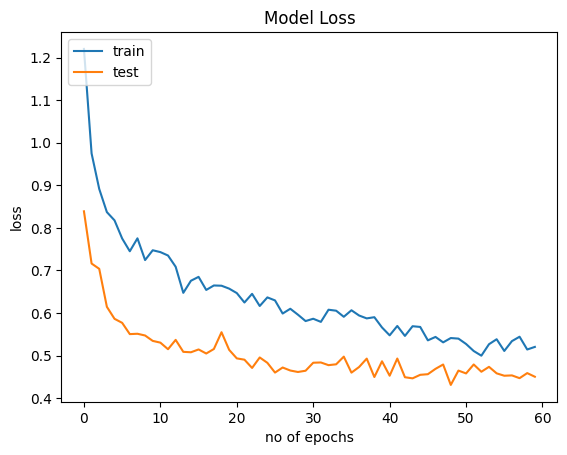

In [12]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('no of epochs')
plt.ylabel('loss')
plt.legend(['train','test'],loc='upper left')
plt.show()


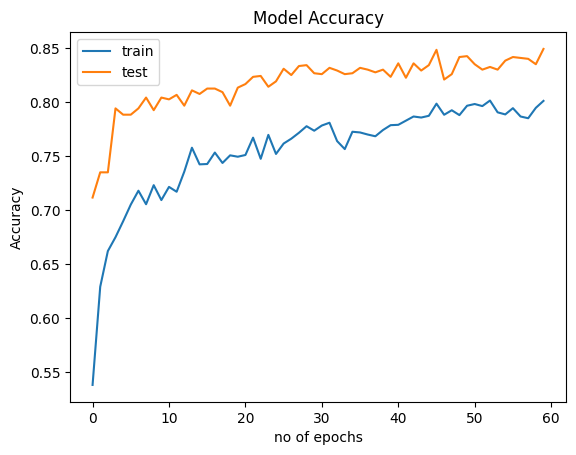

In [13]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('no of epochs')
plt.ylabel('Accuracy')
plt.legend(['train','test'],loc='upper left')
plt.show()


Found 1200 images belonging to 5 classes.
38/38 ━━━━━━━━━━━━━━━━━━━━ 27s 369ms/step


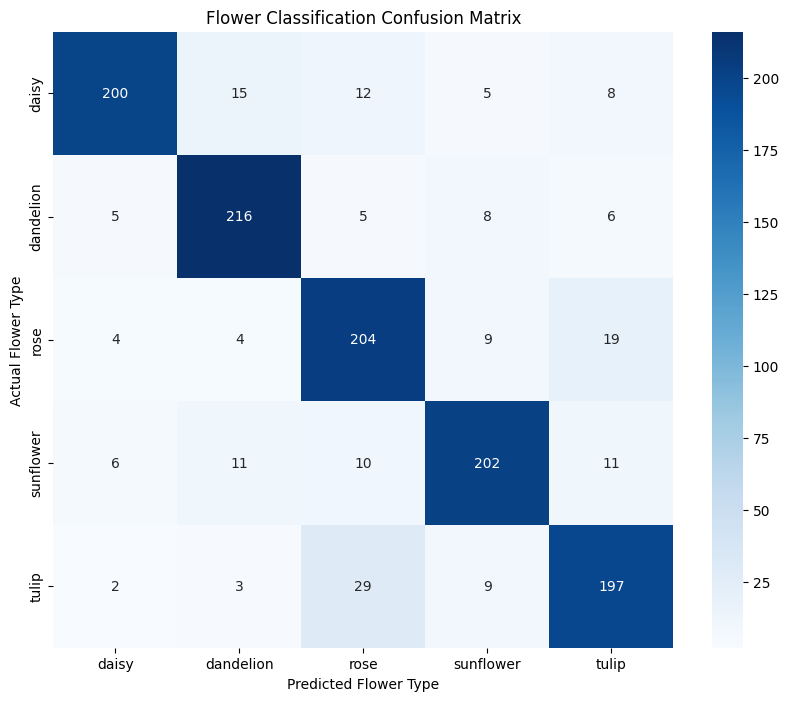

              precision    recall  f1-score   support

       daisy       0.92      0.83      0.88       240
   dandelion       0.87      0.90      0.88       240
        rose       0.78      0.85      0.82       240
   sunflower       0.87      0.84      0.85       240
       tulip       0.82      0.82      0.82       240

    accuracy                           0.85      1200
   macro avg       0.85      0.85      0.85      1200
weighted avg       0.85      0.85      0.85      1200



In [14]:


# 1. Re-load the test data WITHOUT shuffling
# (This ensures the 'True Labels' match the 'Predictions')
test_root = '/content/dataset/test' # Adjust if your path is different
testing_for_matrix = testdatagen.flow_from_directory(
    test_root,
    target_size=(224, 224),
    batch_size=32,
    shuffle=False,
    class_mode='categorical'
)


Y_pred = model.predict(testing_for_matrix)
y_pred = np.argmax(Y_pred, axis=1) # Convert probabilities to class numbers


cm = confusion_matrix(testing_for_matrix.classes, y_pred)
class_names = list(testing_for_matrix.class_indices.keys())


plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_names, yticklabels=class_names)
plt.title('Flower Classification Confusion Matrix')
plt.ylabel('Actual Flower Type')
plt.xlabel('Predicted Flower Type')
plt.show()

# 5. Print the text report (Precision, Recall, F1-Score)
print(classification_report(testing_for_matrix.classes, y_pred, target_names=class_names))